# connect to drive

In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# imports

In [2]:
import pandas as pd
from gensim import corpora, models

# get datasets

In [ ]:
users=pd.read_csv('/content/drive/MyDrive/data/kaggle_recommend/user_s1.csv')
users

,UserID,DegreeType,Major,skills,text
0,72,Master's,Anthropology,"posting, pay, sna, one, clinical, basic, addit...","Master's , Anthropology , posting, pay, sna, o..."
1,554,Bachelor's,Legal Studies,"classification, data entry, compensation, orga...","Bachelor's , Legal Studies , classification, d..."
2,682,High School,NaN,"customer service, client services, training, s...","High School , , customer service, client serv..."
3,744,High School,NaN,"shipping, mold, injection molding, searching, ...","High School , , shipping, mold, injection mol..."
4,769,Bachelor's,Radio-Television,"fit, fit, electrical, e, e, functionality, tec...","Bachelor's , Radio-Television , fit, fit, elec..."
...,...,...,...,...,...
44537,1469981,Master's,Accounting,"cost accounting, cost accounting, client, manu...","Master's , Accounting , cost accounting, cost ..."
44538,1471018,Associate's,Applied Science/Industrial Electricity,"maintenance, maintenance engineering, engineer...","Associate's , Applied Science/Industrial Elect..."
44539,1471027,Master's,Organizational,"administrative, clients, impression, pro, comm...","Master's , Organizational , administrative, cl..."
44540,1471706,High School,NaN,"children, schedule, children, liaison, childre...","High School , , children, schedule, children,..."


In [ ]:
jobs=pd.read_csv('/content/drive/MyDrive/data/kaggle_recommend/job_s1.csv')
jobs

,JobID,clean_title_l,cleaned_extracted_skills,cleaned_extracted_degree,cleaned_extracted_major,text
0,457967,investment analyst,"'investment', 'accounting', 'finance', 'office...",'bachelor',NaN,"investment analyst, 'investment', 'accounting'..."
1,458019,warehouse forklift production,"'warehouse', 'production', 'hard', 'opportunit...",NaN,NaN,"warehouse forklift production, 'warehouse', 'p..."
2,458124,provider contracting representative,"'savings', 'clients', 'public', 'customer serv...",'high school','communications',"provider contracting representative, 'savings'..."
3,458176,senior administrative assistant,"'administrative', 'seeking', 'administrative',...",NaN,NaN,"senior administrative assistant, 'administrati..."
4,458179,cashier tuscaloosa al,"'revenue growth', 'organization', 'customer', ...",NaN,NaN,"cashier tuscaloosa al, 'revenue growth', 'orga..."
...,...,...,...,...,...,...
53880,457742,forklift operators,"'operators', 'manufacturing', 'ged', 'manufact...",'high school',NaN,"forklift operators, 'operators', 'manufacturin..."
53881,457744,training manager luxury retail brand,"'training', 'retail', 'brand', 'training', 're...",'bachelor',NaN,"training manager luxury retail brand, 'trainin..."
53882,457773,staff accountant,"'project managers', 'billing', 'vouchers', 'in...",'bachelor',"'finance', 'accounting'","staff accountant, 'project managers', 'billing..."
53883,457774,senior collections representative,"'clients', 'collection', 'researching', 'resol...",NaN,NaN,"senior collections representative, 'clients', ..."


# prepare datasets

## users

In [ ]:
type(users['skills'][0])

str

In [ ]:
users['skills'][0]

'posting, pay, sna, one, clinical, basic, addition, sna, dignity, patient care, basic, hospital, policies procedures, emergency situations, written communication, patient care, forms, sna, sna, sna, sna, time management, education, school nursing, completion, entry level, clinical, cpr, certification, principles, development, data, status, interpret, chart, patient care, safety, measures, provision, patient care, aseptic technique, patient rights, confidentiality, family, basic, assistants, staffing, clinics, academic medical centers, publications, health, hospital, clinics, cancer treatment, pediatrics, ophthalmology, organ, offers, clinics, intensive care, life support, neurosurgery, beds, satellite, editorial, editorial process, clients, editing, manuscript development, production, texts, reviews, content, materials, clarity, client, nomenclature, grammar, punctuation, publications, content, image editing, art, nomenclature, grammar, punctuation, specs, typography, pagination, style

In [ ]:
users['skills_vec'] = users['skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

In [ ]:
users['skills_vec'][0]

['posting',
 'pay',
 'sna',
 'one',
 'clinical',
 'basic',
 'addition',
 'sna',
 'dignity',
 'patient care',
 'basic',
 'hospital',
 'policies procedures',
 'emergency situations',
 'written communication',
 'patient care',
 'forms',
 'sna',
 'sna',
 'sna',
 'sna',
 'time management',
 'education',
 'school nursing',
 'completion',
 'entry level',
 'clinical',
 'cpr',
 'certification',
 'principles',
 'development',
 'data',
 'status',
 'interpret',
 'chart',
 'patient care',
 'safety',
 'measures',
 'provision',
 'patient care',
 'aseptic technique',
 'patient rights',
 'confidentiality',
 'family',
 'basic',
 'assistants',
 'staffing',
 'clinics',
 'academic medical centers',
 'publications',
 'health',
 'hospital',
 'clinics',
 'cancer treatment',
 'pediatrics',
 'ophthalmology',
 'organ',
 'offers',
 'clinics',
 'intensive care',
 'life support',
 'neurosurgery',
 'beds',
 'satellite',
 'editorial',
 'editorial process',
 'clients',
 'editing',
 'manuscript development',
 'producti

## jobs

In [ ]:
jobs.isna().sum()

JobID                           0
clean_title_l                   0
cleaned_extracted_skills       26
cleaned_extracted_degree    27699
cleaned_extracted_major     44939
text                            0
dtype: int64

In [ ]:
jobs.dropna(subset=['cleaned_extracted_skills'], inplace=True)

In [ ]:
type(jobs['cleaned_extracted_skills'][0])

str

In [ ]:
jobs['cleaned_extracted_skills'][0]

"'investment', 'accounting', 'finance', 'office', 'relocation', 'travel', 'technology', 'technology', 'design tools', 'investment', 'lenovo', 'software', 'ecosystem', 'focal point', 'investment', 'analysis', 'product', 'investment', 'analysis', 'financial analysis modeling', 'evaluation', 'financial support', 'education', 'financial analysis', 'business planning', 'super user', 'microsoft excel', 'microsoft access', 'powerpoint', 'word', 'written communication', 'interpersonal', 'problem solving', 'analytical', 'professional development', 'self', 'foreign operations', 'sap software'"

In [ ]:
jobs['skills_vec'] = jobs['cleaned_extracted_skills'].apply(lambda x: [skill.strip().strip("'") for skill in x.split(',')])

In [ ]:
jobs['skills_vec'][0]

['investment',
 'accounting',
 'finance',
 'office',
 'relocation',
 'travel',
 'technology',
 'technology',
 'design tools',
 'investment',
 'lenovo',
 'software',
 'ecosystem',
 'focal point',
 'investment',
 'analysis',
 'product',
 'investment',
 'analysis',
 'financial analysis modeling',
 'evaluation',
 'financial support',
 'education',
 'financial analysis',
 'business planning',
 'super user',
 'microsoft excel',
 'microsoft access',
 'powerpoint',
 'word',
 'written communication',
 'interpersonal',
 'problem solving',
 'analytical',
 'professional development',
 'self',
 'foreign operations',
 'sap software']

# prepare LDA

In [ ]:
# Load the LDA model
lda_model = models.LdaModel.load('/content/drive/MyDrive/LDA_models/lda_model_25')

def classify_text(lda_model, text):
    # Convert the new text to a bag-of-words vector
    new_text_bow = lda_model.id2word.doc2bow(text)

    # Get topic probabilities for the new text
    topic_probs = lda_model.get_document_topics(new_text_bow)  # List of tuples (topic ID, probability)

    # Sort topics by probability and extract the most dominant topic
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]

    return dominant_topic

# extract topic

## users

In [ ]:
users['topic'] = users['skills_vec'].apply(lambda x: classify_text(lda_model, x))

In [ ]:
users

,UserID,DegreeType,Major,skills,text,skills_vec,topic
0,72,Master's,Anthropology,"posting, pay, sna, one, clinical, basic, addit...","Master's , Anthropology , posting, pay, sna, o...","[posting, pay, sna, one, clinical, basic, addi...",19
1,554,Bachelor's,Legal Studies,"classification, data entry, compensation, orga...","Bachelor's , Legal Studies , classification, d...","[classification, data entry, compensation, org...",18
2,682,High School,NaN,"customer service, client services, training, s...","High School , , customer service, client serv...","[customer service, client services, training, ...",8
3,744,High School,NaN,"shipping, mold, injection molding, searching, ...","High School , , shipping, mold, injection mol...","[shipping, mold, injection molding, searching,...",16
4,769,Bachelor's,Radio-Television,"fit, fit, electrical, e, e, functionality, tec...","Bachelor's , Radio-Television , fit, fit, elec...","[fit, fit, electrical, e, e, functionality, te...",11
...,...,...,...,...,...,...,...
44537,1469981,Master's,Accounting,"cost accounting, cost accounting, client, manu...","Master's , Accounting , cost accounting, cost ...","[cost accounting, cost accounting, client, man...",13
44538,1471018,Associate's,Applied Science/Industrial Electricity,"maintenance, maintenance engineering, engineer...","Associate's , Applied Science/Industrial Elect...","[maintenance, maintenance engineering, enginee...",23
44539,1471027,Master's,Organizational,"administrative, clients, impression, pro, comm...","Master's , Organizational , administrative, cl...","[administrative, clients, impression, pro, com...",18
44540,1471706,High School,NaN,"children, schedule, children, liaison, childre...","High School , , children, schedule, children,...","[children, schedule, children, liaison, childr...",9


from matplotlib import pyplot as plt
users['UserID'].plot(kind='hist', bins=20, title='UserID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
users['topic'].plot(kind='hist', bins=20, title='topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
users.groupby('DegreeType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
users.plot(kind='scatter', x='UserID', y='topic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
users['UserID'].plot(kind='line', figsize=(8, 4), title='UserID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
users['topic'].plot(kind='line', figsize=(8, 4), title='topic')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(users['DegreeType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(users, x='UserID', y='DegreeType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(users['DegreeType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(users, x='topic', y='DegreeType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
users=pd.read_csv('/content/drive/MyDrive/data/kaggle_recommend/users_s1_fin.csv')
jobs=pd.read_csv('/content/drive/MyDrive/data/kaggle_recommend/jobs_s1_fin.csv')

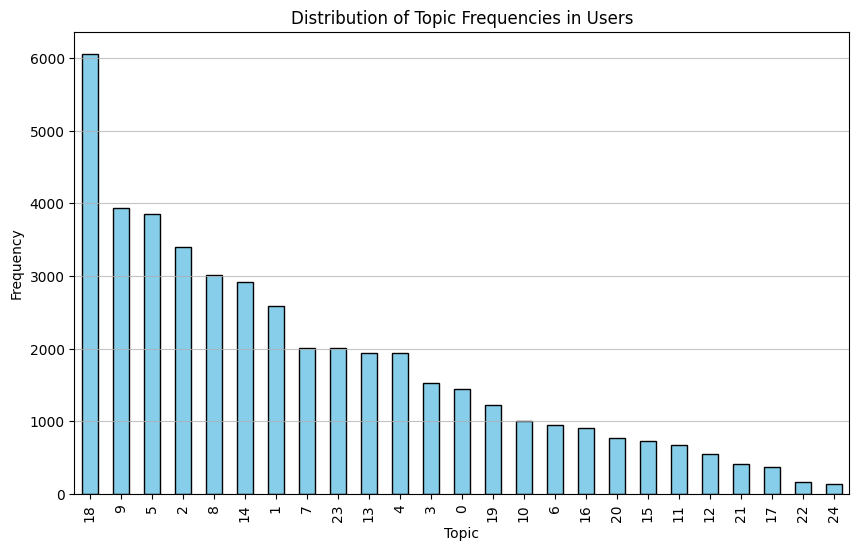

In [4]:
import matplotlib.pyplot as plt

# Count the frequency of each topic
topic_counts = users['topic'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Topic Frequencies in Users')
plt.grid(axis='y', alpha=0.75)

# save plot
plt.savefig('users_topic_histogram.png')
# Show the plot
plt.show()

In [ ]:
users.to_csv('/content/drive/MyDrive/data/kaggle_recommend/users_s1_fin.csv')

## jobs

In [ ]:
jobs['topic'] = jobs['skills_vec'].apply(lambda x: classify_text(lda_model, x))

In [ ]:
jobs.to_csv('/content/drive/MyDrive/data/kaggle_recommend/jobs_s1_fin.csv')

In [ ]:
jobs

,JobID,clean_title_l,cleaned_extracted_skills,cleaned_extracted_degree,cleaned_extracted_major,text,skills_vec,topic
0,457967,investment analyst,"'investment', 'accounting', 'finance', 'office...",'bachelor',NaN,"investment analyst, 'investment', 'accounting'...","[investment, accounting, finance, office, relo...",2
1,458019,warehouse forklift production,"'warehouse', 'production', 'hard', 'opportunit...",NaN,NaN,"warehouse forklift production, 'warehouse', 'p...","[warehouse, production, hard, opportunities, w...",7
2,458124,provider contracting representative,"'savings', 'clients', 'public', 'customer serv...",'high school','communications',"provider contracting representative, 'savings'...","[savings, clients, public, customer service, p...",18
3,458176,senior administrative assistant,"'administrative', 'seeking', 'administrative',...",NaN,NaN,"senior administrative assistant, 'administrati...","[administrative, seeking, administrative, supp...",18
4,458179,cashier tuscaloosa al,"'revenue growth', 'organization', 'customer', ...",NaN,NaN,"cashier tuscaloosa al, 'revenue growth', 'orga...","[revenue growth, organization, customer, servi...",6
...,...,...,...,...,...,...,...,...
53880,457742,forklift operators,"'operators', 'manufacturing', 'ged', 'manufact...",'high school',NaN,"forklift operators, 'operators', 'manufacturin...","[operators, manufacturing, ged, manufacturing,...",7
53881,457744,training manager luxury retail brand,"'training', 'retail', 'brand', 'training', 're...",'bachelor',NaN,"training manager luxury retail brand, 'trainin...","[training, retail, brand, training, retail, br...",9
53882,457773,staff accountant,"'project managers', 'billing', 'vouchers', 'in...",'bachelor',"'finance', 'accounting'","staff accountant, 'project managers', 'billing...","[project managers, billing, vouchers, invoices...",13
53883,457774,senior collections representative,"'clients', 'collection', 'researching', 'resol...",NaN,NaN,"senior collections representative, 'clients', ...","[clients, collection, researching, resolving i...",14


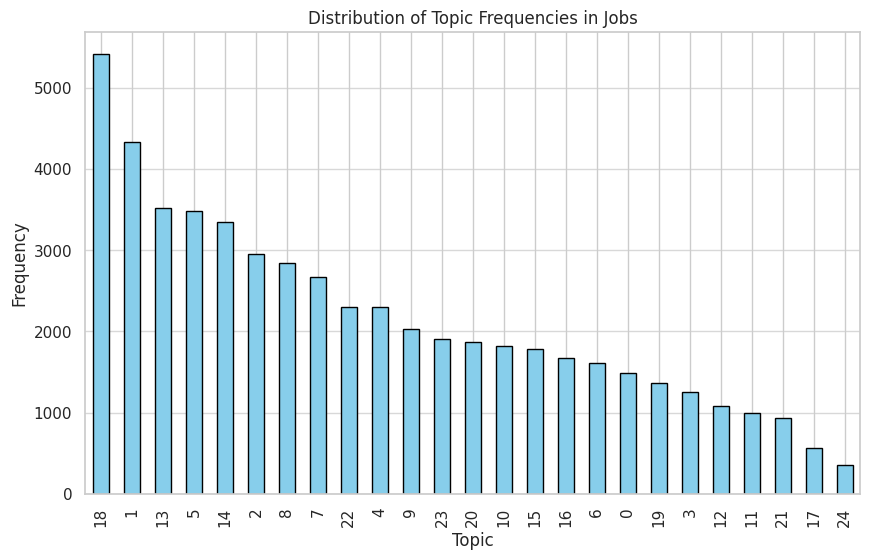

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each topic
topic_counts = jobs['topic'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Topic Frequencies in Jobs')
plt.grid(axis='y', alpha=0.75)

# save plot
plt.savefig('jobs_topic_histogram.png')
# Show the plot
plt.show()
